# ETS - HOLT's WINTER SEASONAL MODEL

In [1]:
#Importing the required packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose 
%matplotlib inline

C:\Users\Sankar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## MONTHLY DATA

In [2]:
df = pd.read_csv('ngpp-data.csv')
time = pd.to_datetime(df['Date'])
data = list(df['price'])
ngpdata = pd.Series(data, time)

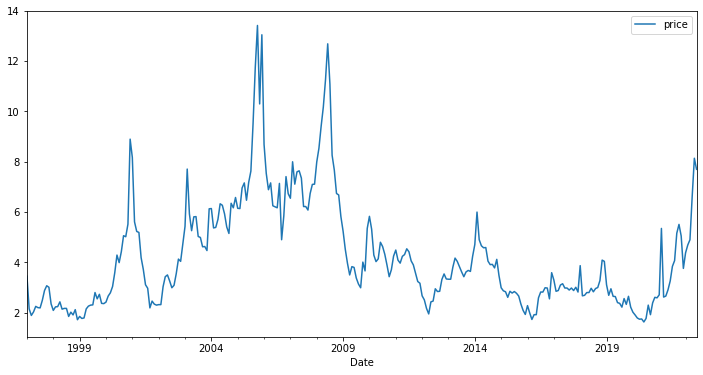

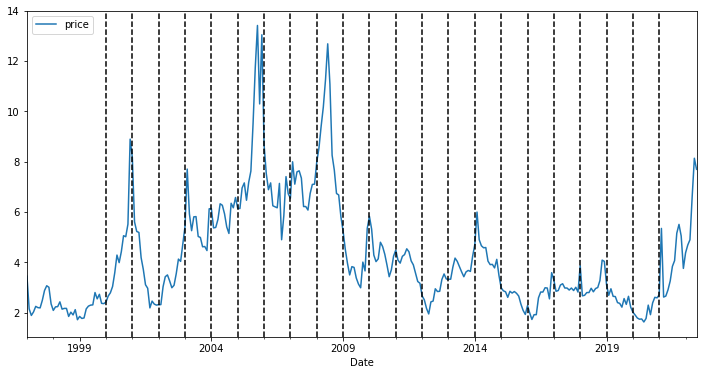

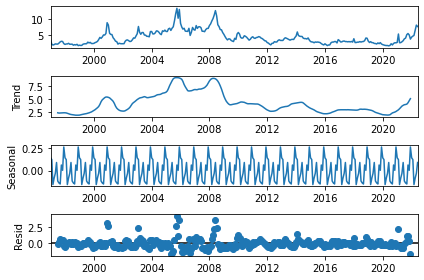

In [3]:
#Read the data and plot the graph
data_orig = pd.read_csv('ngpp-data.csv')
data_orig['Date'] = pd.to_datetime(data_orig['Date']) 
ax = data_orig.plot(x='Date', y='price', figsize=(12,6))

#observe for any seasonal patterns
ax = data_orig.plot(x='Date', y='price', figsize=(12,6))
xcoords = ['2000-01-01','2001-01-01','2002-01-01','2003-01-01','2004-01-01','2005-01-01','2006-01-01',
           '2007-01-01','2008-01-01','2009-01-01','2010-01-01','2011-01-01','2012-01-01','2013-01-01','2014-01-01',
           '2015-01-01', '2016-01-01','2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
          '2021-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')
    
#Deseasonalize the graph
data_orig.set_index('Date', inplace=True)
analysis = data_orig[['price']].copy()

decompose_result_mult = seasonal_decompose(analysis, model="additive")
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()
plt.show()

C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Sankar\AppData\Local\Temp/ipykernel_9608/376783889.py:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit3 = ExponentialSmoothing(analysis, seasonal_periods=9

Forecasts Using Holt-Winters' method


C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


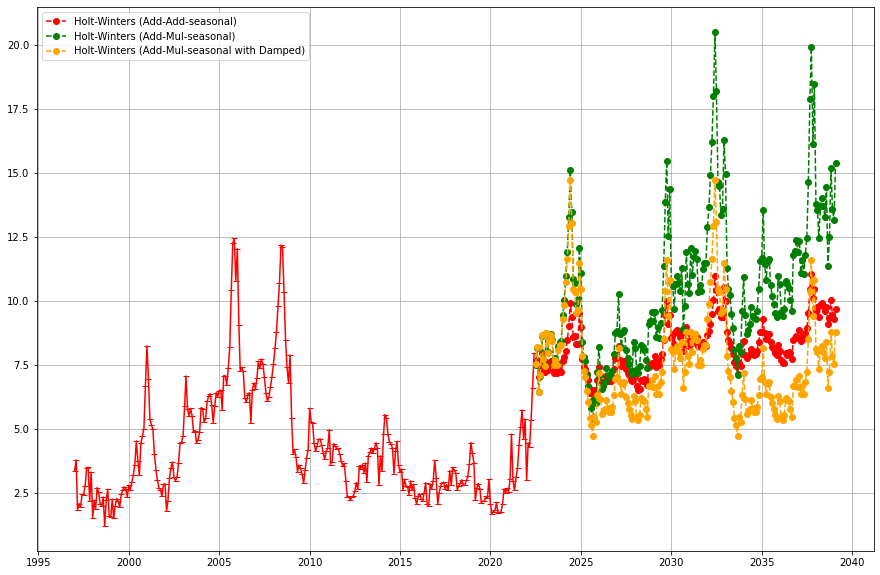

In [8]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = ExponentialSmoothing(analysis,seasonal_periods=96, trend='add', seasonal='add').fit()
fit2 = ExponentialSmoothing(analysis, seasonal_periods=96, trend='add', seasonal='mul').fit()
fit3 = ExponentialSmoothing(analysis, seasonal_periods=96, trend='add', seasonal='add', damped=True).fit()
fit4 = ExponentialSmoothing(analysis, seasonal_periods=96, trend='add', seasonal='mul', damped=True).fit()

fit1.params

# Graphical Comparison of the First three Models
plt.figure(figsize=[15,10])
plt.grid(True)

# Actucal data
# plt.plot(ngpdata,label='data',color='black',marker='o)

# Model-1
# plt.plot(fit1.forecast(200),label='Holt-Winters (Add-Add-seasonal)',linestyle='dashed',color='red',marker='o')
# plt.plot(fit1.fittedvalues,color='red',marker='_')

# Model-2
plt.plot(fit2.forecast(200),label='Holt-Winters (Add-Mul-seasonal)',linestyle='dashed',color='green',marker='o')
# plt.plot(fit2.fittedvalues,color='green',marker='_')

# Model-3
# plt.plot(fit3.forecast(200),label='Holt-Winters (Add-Add-seasonal with Damped)',linestyle='dashed',color='blue',marker='o')
# plt.plot(fit3.fittedvalues,color='blue',marker='_')

# Model - 4
plt.plot(fit4.forecast(200),label='Holt-Winters (Add-Mul-seasonal with Damped)',linestyle='dashed',color='orange',marker='o')
# plt.plot(fit4.fittedvalues,color='grey',marker='_')
print("Forecasts Using Holt-Winters' method")

plt.legend(loc=2)

C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Sankar\AppData\Local\Temp/ipykernel_9608/1377108652.py:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit3 = ExponentialSmoothing(analysis.iloc[:245], seasonal_periods=12, trend='add', seasonal='add', damped=True).fit()
C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency infor

Forecasts Using Holt-Winters' method


C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


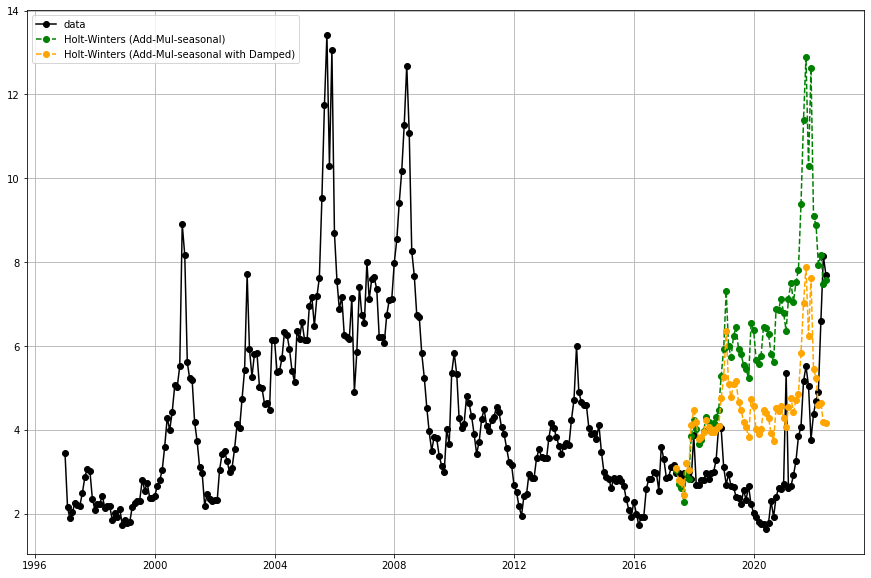

In [9]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = ExponentialSmoothing(analysis.iloc[:245],seasonal_periods=12, trend='add', seasonal='add').fit()
fit2 = ExponentialSmoothing(analysis.iloc[:245], seasonal_periods=96, trend='add', seasonal='mul').fit()
fit3 = ExponentialSmoothing(analysis.iloc[:245], seasonal_periods=12, trend='add', seasonal='add', damped=True).fit()
fit4 = ExponentialSmoothing(analysis.iloc[:245], seasonal_periods=96, trend='add', seasonal='mul', damped=True).fit()

fit1.params

# Graphical Comparison of the First three Models
plt.figure(figsize=[15,10])
plt.grid(True)

# Actucal data
plt.plot(analysis,label='data',color='black',marker='o')

# Model-1
# plt.plot(fit1.forecast(200),label='Holt-Winters (Add-Add-seasonal)',linestyle='dashed',color='red',marker='o')
# plt.plot(fit1.fittedvalues,color='red',marker='_')

# Model-2
# plt.plot(fit2.forecast(61),label='Holt-Winters (Add-Mul-seasonal)',linestyle='dashed',color='green',marker='o')
# plt.plot(fit2.fittedvalues,color='green',marker='_')

# Model-3
# plt.plot(fit3.forecast(200),label='Holt-Winters (Add-Add-seasonal with Damped)',linestyle='dashed',color='blue',marker='o')
# plt.plot(fit3.fittedvalues,color='blue',marker='_')

# Model - 4
plt.plot(fit4.forecast(61),label='Holt-Winters (Add-Mul-seasonal with Damped)',linestyle='dashed',color='orange',marker='o')
# plt.plot(fit4.fittedvalues,color='grey',marker='_')
print("Forecasts Using Holt-Winters' method")

# plt.plot(ngpdata,label='data',color='black',marker='o)
plt.legend(loc=2)

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(analysis.iloc[245:],fit2.forecast(61)))
print(mean_absolute_error(analysis.iloc[245:],fit4.forecast(61)))
print(sqrt(mean_squared_error(analysis.iloc[245:],fit2.forecast(61))))
print(sqrt(mean_squared_error(analysis.iloc[245:],fit4.forecast(61))))

2.9670529639471535
1.646011029817809
3.5505046572908436
1.8903627432511465


C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Sankar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [32]:
fit2.aic

-199.22165360520614

In [33]:
fit4.aic

-208.4885106659205